In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df = pd.read_csv("../../assets/cleaned_data.csv")
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


How many rows and columns?

In [87]:
df.shape

(9341, 26)

What is the correlation between the variables and the price? (Why might that be?)

Which variables have the greatest influence on the price?

Which variables have the least influence on the price?

In [88]:
correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)
correlation_df["price"]

price            1.00
living_area      0.35
frontages        0.17
bedrooms         0.43
bathrooms        0.56
liv_room_surf    0.16
kitchen_type     0.23
showers          0.13
toilets          0.56
terrace          0.25
garden           0.07
elevator        -0.07
swimming_pool    0.28
status_build     0.18
furnished        0.00
Name: price, dtype: float64

How are variables correlated to each other? (Why?)

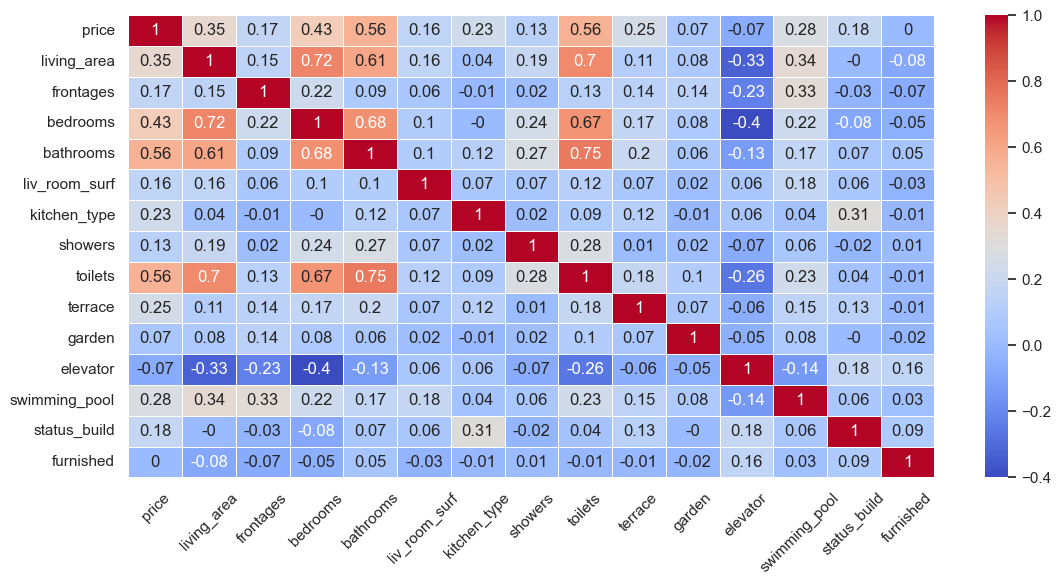

In [89]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

Percentage of missing values per column?

In [90]:
missing_values = df.isnull().mean()
print(missing_values)

id                  0.000000
building_type       0.000000
building_subtype    0.000000
price               0.003961
living_area         0.014131
frontages           0.179638
bedrooms            0.016272
bathrooms           0.128894
liv_room_surf       0.387111
kitchen_type        0.111230
showers             0.663419
toilets             0.088963
basement            0.519002
terrace             0.000000
garden              0.000000
elevator            0.449952
swimming_pool       0.575634
status_build        0.112836
furnished           0.459051
energy_class        0.000000
heating             0.134996
flood_zone          0.453913
surroundings        0.570603
zipcode             0.000000
municipality        0.000000
province            0.000000
dtype: float64


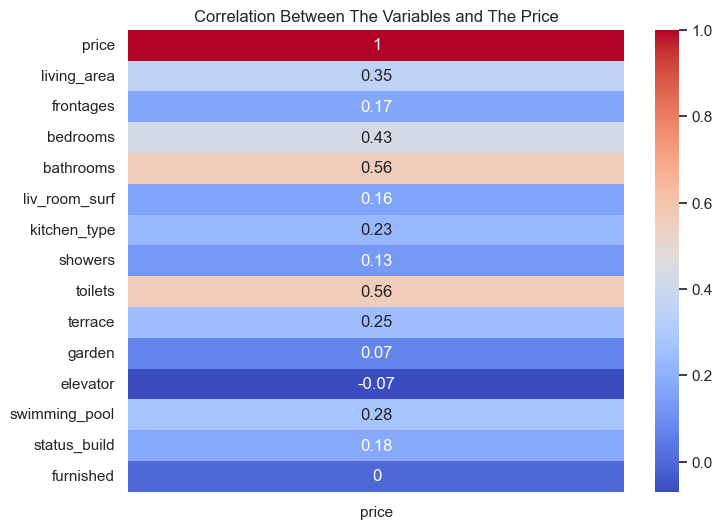

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df[['price']], annot=True, cmap='coolwarm')
plt.title('Correlation Between The Variables and The Price')
plt.show()

How are variables correlated to each other? (Why?)

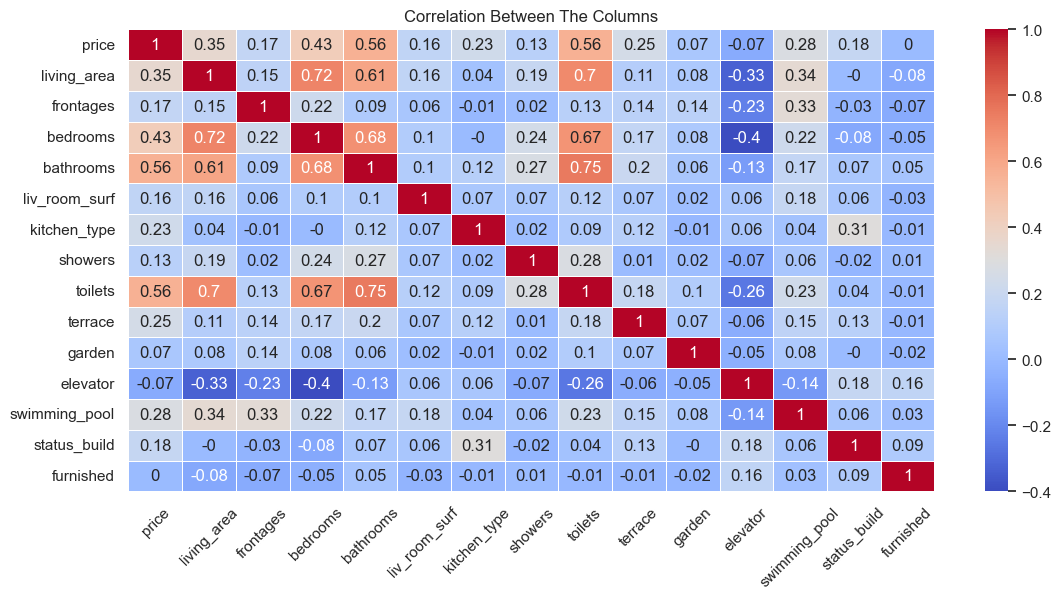

In [98]:
correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title('Correlation Between The Columns')
plt.show()

<Axes: >

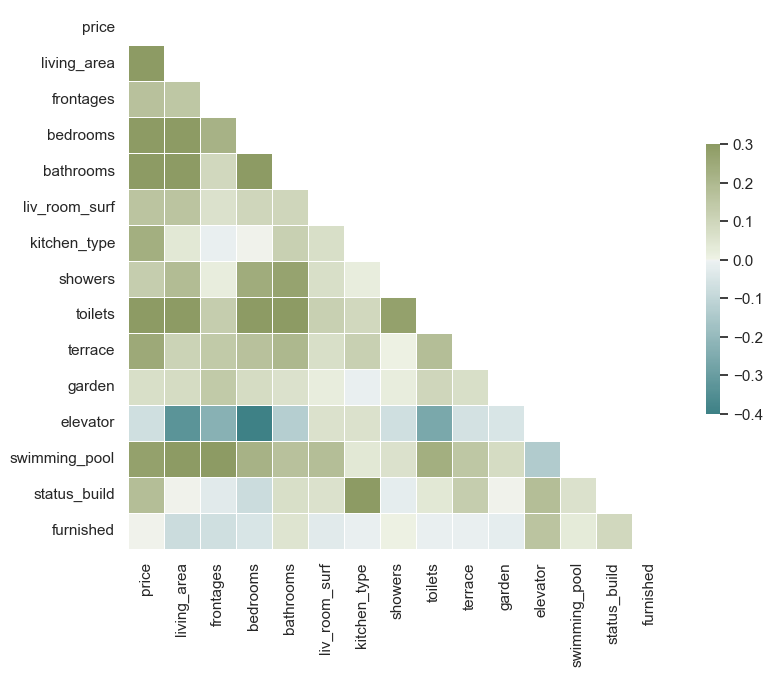

In [93]:
sns.set_theme(style="white")

correlation = df.drop(columns=['id', 'surroundings', 'energy_class','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 

correlation_df = correlation.corr().round(2)

mask = np.triu(np.ones_like(correlation_df, dtype=bool))

f, ax = plt.subplots(figsize=(10, 7))

cmap = sns.diverging_palette(200, 100, as_cmap=True)

sns.heatmap(correlation_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

In [94]:
df.columns
# 7 - Qualitative
# 18 - Quantitative

Index(['id', 'building_type', 'building_subtype', 'price', 'living_area',
       'frontages', 'bedrooms', 'bathrooms', 'liv_room_surf', 'kitchen_type',
       'showers', 'toilets', 'basement', 'terrace', 'garden', 'elevator',
       'swimming_pool', 'status_build', 'furnished', 'energy_class', 'heating',
       'flood_zone', 'surroundings', 'zipcode', 'municipality', 'province'],
      dtype='object')

Percentage of missing values per column?


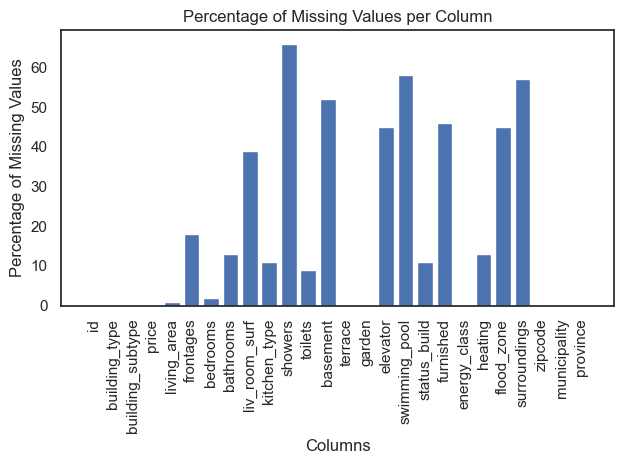

In [95]:
missing_values = df.isnull().mean().round(2)
values = missing_values *100

plt.bar(values.index, values)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Plot the outliers.



Which variables would you delete and why ?


Represent the number of properties according to their surface using a histogram.


In your opinion, which 5 variables are the most important and why?


What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)
What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)